In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv")
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<Axes: >

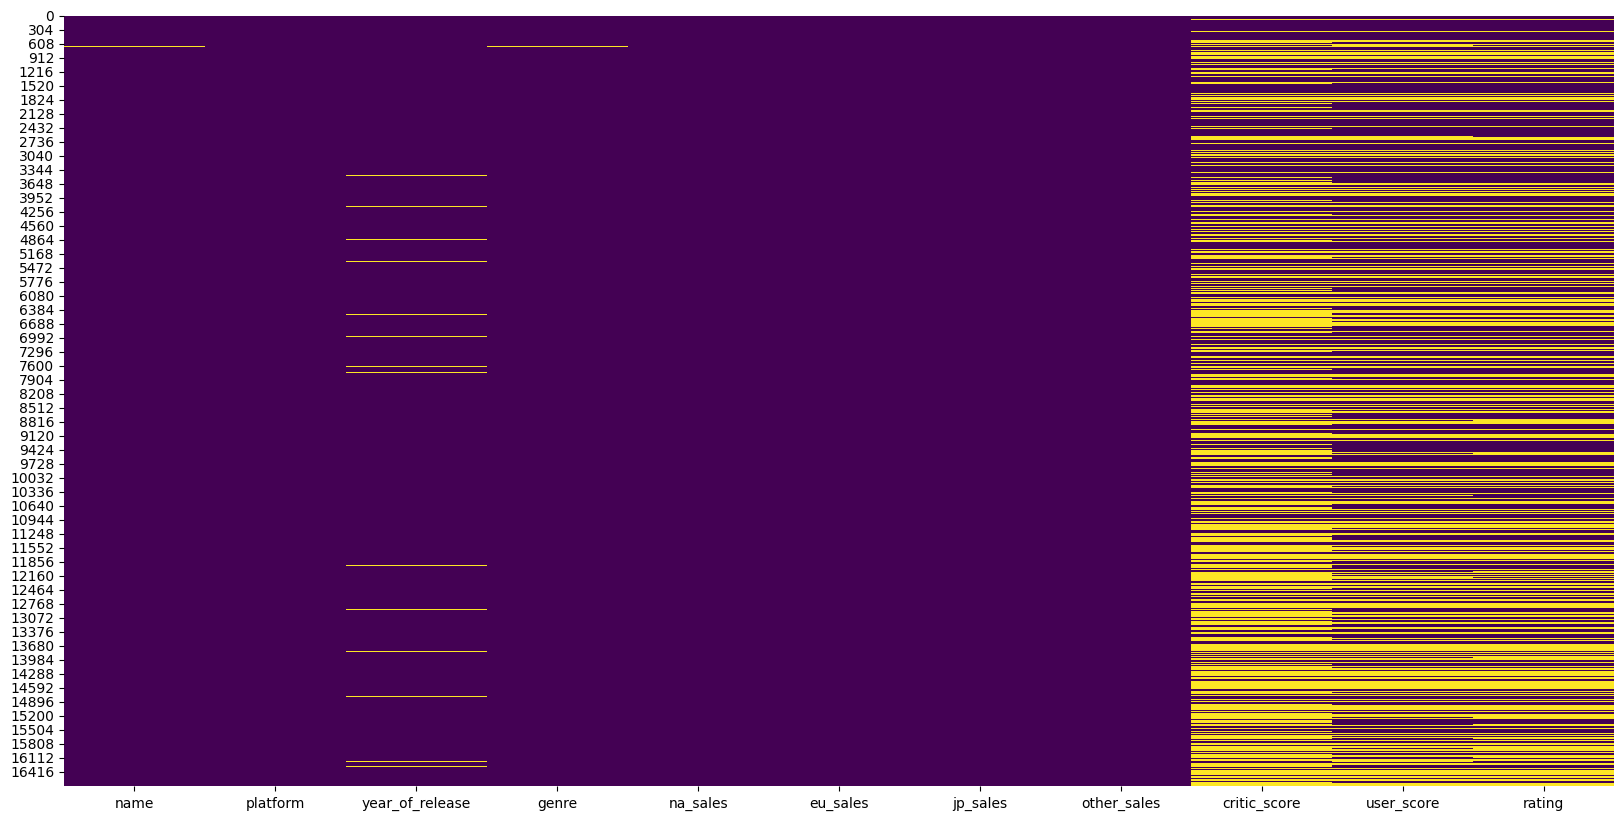

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

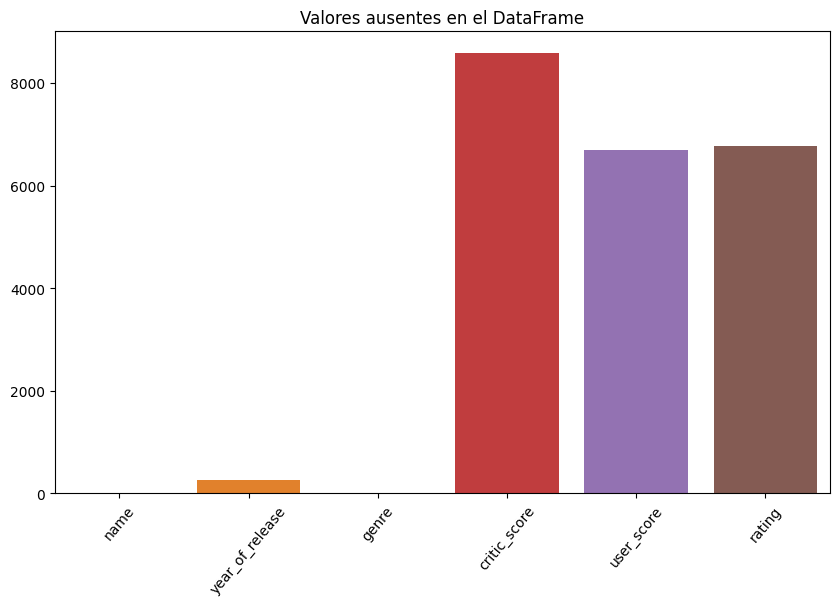

In [6]:
missing_values_count = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_columns = missing_values_count[missing_values_count > 0]
sns.barplot(x=missing_columns.index, y=missing_columns.values)
plt.title('Valores ausentes en el DataFrame')
plt.xticks(rotation=50)
plt.show()

In [7]:
total_missing = df.isnull().sum().sum()
total_cells = df.size

missing_percentage_total = (total_missing / total_cells) * 100

print(f"Porcentaje total de valores ausentes en el DataFrame: {missing_percentage_total:.2f}%")

missing_values_count = df.isnull().sum()
total_rows = len(df)

missing_percentage = (missing_values_count / total_rows) * 100

print("Porcentaje de valores ausentes por columna:")
for column, percentage in missing_percentage.items():
    if percentage > 0:
        print(f"{column}: {int(percentage)}%")

Porcentaje total de valores ausentes en el DataFrame: 12.14%
Porcentaje de valores ausentes por columna:
name: 0%
year_of_release: 1%
genre: 0%
critic_score: 51%
user_score: 40%
rating: 40%


In [8]:
# Reemplazo "tbd" con None
df['user_score'] = df['user_score'].replace('tbd',None).astype(float)

In [9]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [10]:
df.dropna()['platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       652
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: platform, dtype: int64

In [11]:
df_clean = df.dropna()
PC_user_score = df_clean.query('platform=="PC"')['user_score']
XOne_user_score = df_clean.query('platform=="XOne"')['user_score']

print(f'''
Promedio de PC: {PC_user_score.mean()}
Promedio de XOne: {XOne_user_score.mean()}
''')


Promedio de PC: 7.0541411042944775
Promedio de XOne: 6.49308176100629



H0 :  Los promedios son iguales

H1 :  Los promedios no son iguales

In [12]:
from scipy.stats import ttest_ind

ttest_ind(PC_user_score, XOne_user_score)

# Conclusión que los promedios son diferentes...

Ttest_indResult(statistic=4.240196550569419, pvalue=2.4909638124872165e-05)

In [13]:
juego = "LEGO Batman: The Videogame"
df[df['name']==juego]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8.0,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


### Imputar year_of_release

In [44]:
game_median_year = df_clean.groupby('name')['year_of_release'].median()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16543 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [46]:
df['year_of_release'] = df.set_index('name')['year_of_release'].fillna(game_median_year).reset_index(drop=True)

In [47]:
def extract_year(row):
    if pd.isna(row['name']):
      return row.year_of_release
    res = re.search(r'\b\d{4}\b', row['name'])
    if pd.isna(row.year_of_release) and res:
        row.year_of_release = int(res.group())
    return row.year_of_release

In [48]:
df['year_of_release'] = df.apply(extract_year, axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16543 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [49]:
total_missing = df.isnull().sum().sum()
total_cells = df.size

missing_percentage_total = (total_missing / total_cells) * 100

print(f"Porcentaje total de valores ausentes en el DataFrame: {missing_percentage_total:.2f}%")

missing_values_count = df.isnull().sum()
total_rows = len(df)

missing_percentage = (missing_values_count / total_rows) * 100

print("Porcentaje de valores ausentes por columna:")
for column, percentage in missing_percentage.items():
    if percentage > 0:
        print(f"{column}: {int(percentage)}%")

Porcentaje total de valores ausentes en el DataFrame: 13.40%
Porcentaje de valores ausentes por columna:
name: 0%
year_of_release: 0%
genre: 0%
critic_score: 51%
user_score: 54%
rating: 40%
